In [32]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [33]:
df=pd.read_csv('temperature.csv')

In [34]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [35]:
df.shape

(7752, 25)

In [36]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [37]:
df.keys()

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [38]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [39]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

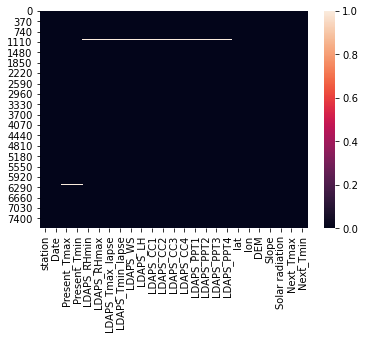

In [40]:
sns.heatmap(df.isnull())

In [41]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [42]:
df=df.fillna(method='ffill')

In [43]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [44]:
#here we do some analysis

<AxesSubplot:>

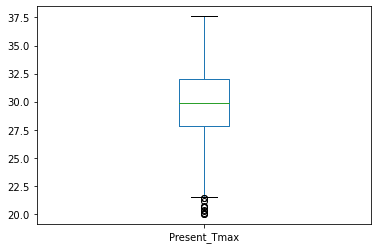

In [45]:
#univariate analysis
df['Present_Tmax'].plot.box()

<AxesSubplot:>

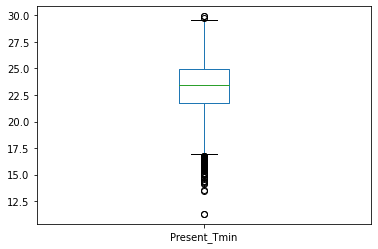

In [46]:
df['Present_Tmin'].plot.box()

<AxesSubplot:>

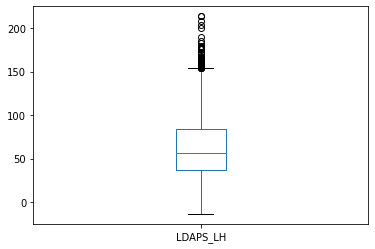

In [47]:
df['LDAPS_LH'].plot.box()

<AxesSubplot:>

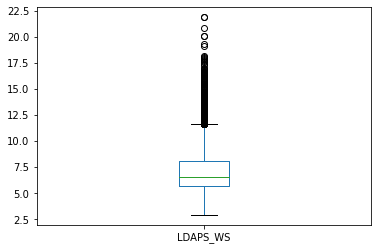

In [48]:
df['LDAPS_WS'].plot.box()

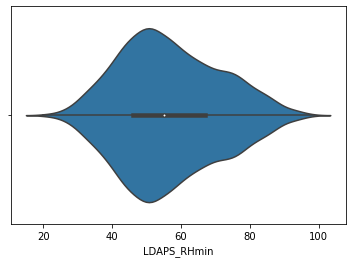

In [49]:
sns.violinplot(x='LDAPS_RHmin',data=df)
plt.show()

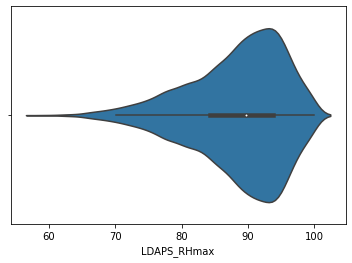

In [50]:
sns.violinplot(x='LDAPS_RHmax',data=df)
plt.show()

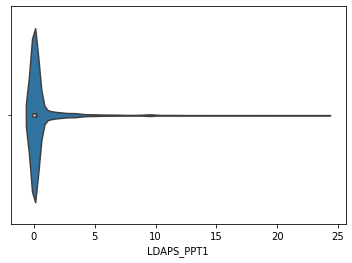

In [51]:
sns.violinplot(x='LDAPS_PPT1',data=df)
plt.show()

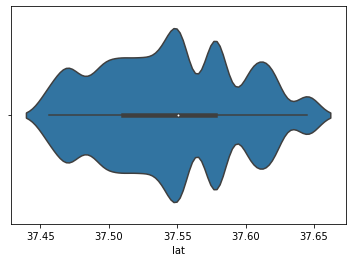

In [52]:
sns.violinplot(x='lat',data=df)
plt.show()

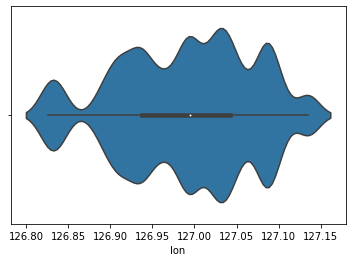

In [53]:
sns.violinplot(x='lon',data=df)
plt.show()

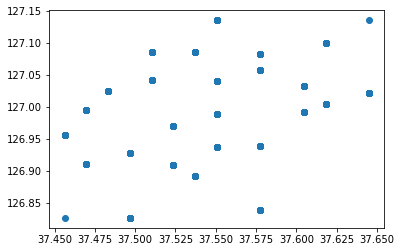

In [54]:
plt.scatter(df['lat'],df['lon'])
plt.show()

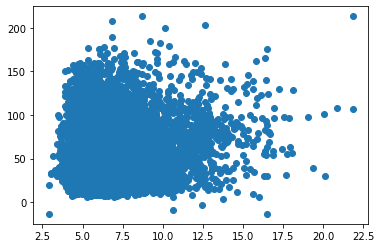

In [55]:
plt.scatter(df['LDAPS_WS'],df['LDAPS_LH'])
plt.show()

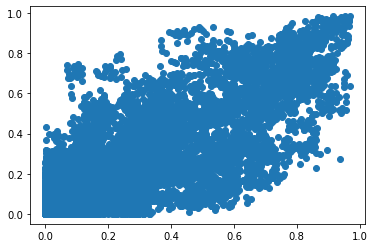

In [56]:
plt.scatter(df['LDAPS_CC2'],df['LDAPS_CC3'])
plt.show()

In [57]:
df.drop('Date',axis=1,inplace=True)

In [58]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [59]:
from scipy.stats import zscore

In [60]:
z=np.abs(zscore(df))
z

array([[1.66415031, 0.360552  , 0.75816525, ..., 1.51793488, 0.37508983,
        0.69645021],
       [1.52550689, 0.71707697, 0.67526674, ..., 1.22994952, 0.07240051,
        0.17395312],
       [1.38686347, 0.61604925, 0.02937058, ..., 1.21653443, 0.26418209,
        0.38873605],
       ...,
       [1.66329184, 2.2127268 , 2.41613541, ..., 2.0743251 , 0.79061658,
        2.22374939],
       [1.66329184, 3.29035577, 4.94453991, ..., 2.35821196, 4.11483058,
        4.67546649],
       [1.66329184, 2.63660358, 2.76502135, ..., 1.51793488, 2.75734259,
        2.76006898]])

In [61]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 7, 14, 14, ..., 14, 15, 16], dtype=int64))


In [62]:
df.skew()

station            -0.000100
Present_Tmax       -0.262761
Present_Tmin       -0.365327
LDAPS_RHmin         0.305376
LDAPS_RHmax        -0.840464
LDAPS_Tmax_lapse   -0.237722
LDAPS_Tmin_lapse   -0.576234
LDAPS_WS            1.572524
LDAPS_LH            0.677272
LDAPS_CC1           0.435814
LDAPS_CC2           0.471318
LDAPS_CC3           0.640210
LDAPS_CC4           0.663585
LDAPS_PPT1          5.077981
LDAPS_PPT2          5.776895
LDAPS_PPT3          6.458810
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339228
Next_Tmin          -0.402800
dtype: float64

In [65]:
x=df.drop(columns=['Next_Tmax','Next_Tmin'])

In [66]:
x.shape

(7752, 22)

In [68]:
y=df[['Next_Tmax','Next_Tmin']]

In [69]:
y.shape

(7752, 2)

In [71]:
for i in x.columns:
    if x[i].skew()>0.5:
        x[i]=np.cbrt(x[i])
        if x[i].skew()<-0.5:
            x[i]=np.cbrt(x[i])
            
x.skew()

station            -0.000100
Present_Tmax       -0.262761
Present_Tmin       -0.365327
LDAPS_RHmin         0.305376
LDAPS_RHmax        -0.840464
LDAPS_Tmax_lapse   -0.237722
LDAPS_Tmin_lapse   -0.576234
LDAPS_WS            0.882453
LDAPS_LH           -0.400610
LDAPS_CC1           0.435814
LDAPS_CC2           0.471318
LDAPS_CC3          -2.541319
LDAPS_CC4          -0.470487
LDAPS_PPT1          1.921843
LDAPS_PPT2          2.282765
LDAPS_PPT3          2.577780
LDAPS_PPT4          2.872150
lat                 0.087062
lon                -0.285213
DEM                 0.919779
Slope               0.614110
Solar radiation    -0.511210
dtype: float64

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=247)

In [75]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6046, 22)
(1706, 22)
(6046, 2)
(1706, 2)


In [76]:
lm=LinearRegression()


In [77]:
lm.fit(x_train,y_train)

LinearRegression()

In [78]:
lm.coef_

array([[ 2.21861972e-02,  1.49695004e-01,  2.30068277e-02,
         2.47725119e-02,  2.95993049e-03,  6.83717672e-01,
         7.94164536e-02, -1.74425663e+00,  3.22514483e-01,
        -8.37968157e-01, -9.34765113e-01, -4.28788012e-01,
        -1.10482060e+00, -1.09162832e-01,  2.89477309e-01,
        -2.58752550e-01, -2.61450268e-02, -4.03423209e-01,
        -1.79960305e+00, -9.41784999e-02,  3.14226960e-01,
         1.35242636e-05],
       [ 2.91637840e-03,  3.51892956e-02,  2.35365953e-01,
         1.93185270e-02,  1.25998056e-02,  1.14522396e-01,
         6.04286605e-01,  5.48932564e-01,  8.26718347e-02,
        -1.86408185e-01,  4.26932490e-01, -3.89542342e-02,
         2.65024836e-01, -2.28358779e-01, -2.50635483e-01,
        -1.33602576e-03, -3.32381624e-01, -8.98790749e-01,
        -3.42549976e-01, -3.62165587e-01,  6.11706767e-01,
        -4.34439274e-05]])

In [79]:
lm.intercept_

array([248.59488486,  73.40782815])

In [80]:
lm.score(x_train,y_train)

0.8024565966032643

In [81]:
#predict the values
pred=lm.predict(x_test)
print("predicted result price:",pred)
print("actual price",y_test)

predicted result price: [[28.96792462 23.54146885]
 [27.17122434 24.0910313 ]
 [29.12557752 23.1298042 ]
 ...
 [31.53407936 24.22908319]
 [32.48582934 23.45855849]
 [32.42838095 23.6995718 ]]
actual price       Next_Tmax  Next_Tmin
1510       32.1       23.3
263        25.7       23.6
5017       31.1       23.9
5438       32.1       26.5
3836       33.2       24.2
...         ...        ...
4859       32.8       21.0
3675       22.9       19.8
738        30.9       23.0
7191       30.6       22.9
1824       34.2       23.0

[1706 rows x 2 columns]


In [82]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))


error:
mean absolute error: 0.9456644096796358
mean squared error: 1.566934287843102


In [84]:
#r2score
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.8139030837136867


In [85]:
import joblib

In [86]:
joblib.dump(lm,"Temperaturelm.obj")

['Temperaturelm.obj']